# Pymaceuticals Inc.
----
Analysis

- The Capomulin and Ramicane drug regimens stood out as the two most effective treatments. Average tumor volume and final tumor volume were notably less than other drug options. Additionally, the data for these two drugs showed the least variance, highlighting consistency in its efficacy.

- The Infubinol and Ceftamin drug regimens were two other relatively effective treatments, although they were a tier behind the top two drugs in their ability to decrease tumor volume and in their variance. Infubinol did show one outlier case of treatment efficacy that was on par with median final tumor volumes of Capomulin and Ramicane treatment, but otherwise remained less effective.

- In looking more closely at Capomulin treatment efficacy, and in sampling random mouse subjects, the time versus tumor volume comparison showed a general trend of decrease in volume over the course of 30-45 days in total. Additionally, in comparing mouse weight to tumor volume, it is evident by regression modeling that higher mouse weight positively correlates to higher tumor volume (r-value of 0.84 demonstrates strong correlation).

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
mouse_study_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [109]:
# Checking the number of mice.
num_mice = mouse_study_complete["Mouse ID"].nunique()
num_mice

249

In [110]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_study_complete[mouse_study_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [111]:
# Get all the data for the duplicate mouse ID.
duplicate_mice_data = mouse_study_complete[mouse_study_complete["Mouse ID"] == "g989"]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [112]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_cleaned = mouse_study_complete[mouse_study_complete["Mouse ID"] != "g989"]
mouse_data_cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [113]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = mouse_data_cleaned["Mouse ID"].nunique()
num_mice_cleaned

248

# Summary Statistics

In [114]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

grouped_data = mouse_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean_tumor_volume = grouped_data.mean()
median_tumor_volume = grouped_data.median()
variance_tumor_volume = grouped_data.var()
std_tumor_volume = grouped_data.std()
sem_tumor_volume = grouped_data.apply(st.sem)

tumor_volume_stats = pd.DataFrame({"Mean Tumor Volume (mm3)": mean_tumor_volume,
                                   "Median Tumor Volume (mm3)": median_tumor_volume,
                                   "Tumor Volume Variance": variance_tumor_volume,
                                   "Tumor Volume Std. Dev.": std_tumor_volume,
                                   "Tumor Volume Std. Err.": sem_tumor_volume})

tumor_volume_stats.index.name = "Drug Regimen"
tumor_volume_stats

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [115]:
# Using the aggregation method, produce the same summary statistics in a single line

tumor_volume_stats_agg = grouped_data.agg(mean_tumor_volume = "mean",
                                          median_tumor_volume = "median",
                                          tumor_volume_variance = "var",
                                          tumor_volume_std = "std",
                                          tumor_volume_sem = st.sem)

tumor_volume_stats_agg.index.name = "Drug Regimen"
tumor_volume_stats_agg

,mean_tumor_volume,median_tumor_volume,tumor_volume_variance,tumor_volume_std,tumor_volume_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

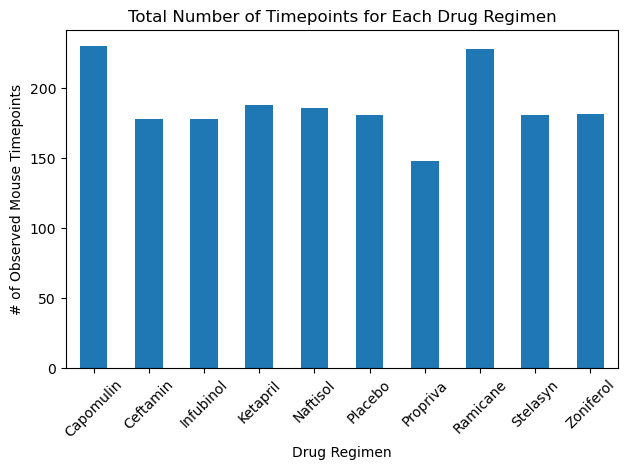

In [116]:
# Create a groupby object with the total number of rows (Mouse ID/Timepoints) for each drug regimen
row_counts = mouse_data_cleaned.groupby("Drug Regimen").size()

# Generate a bar plot using Pandas.
row_counts.plot(kind="bar")

# Add labels and display
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

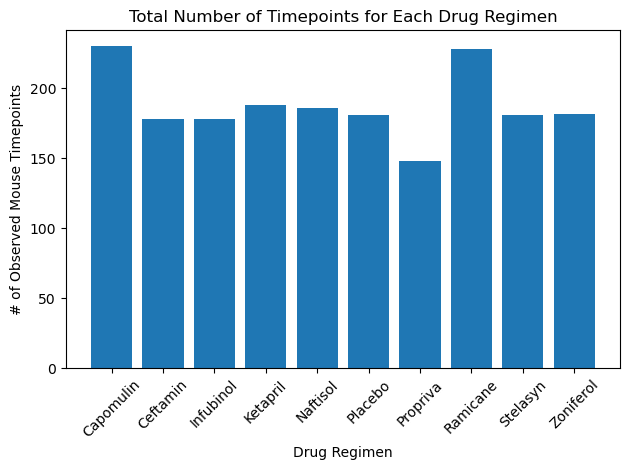

In [117]:
# Generate a bar plot using pyplot.
plt.figure()
plt.bar(row_counts.index, row_counts.values)

# Add labels and display
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

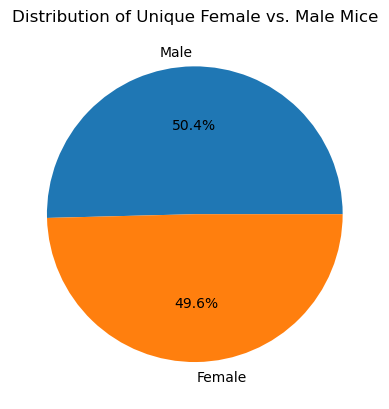

In [118]:
# Get the unique mice with their gender
unique_mice_gender = mouse_data_cleaned[["Mouse ID", "Sex"]].drop_duplicates()

# Create a Series with counts of uniqute female and male mice used in the study 
gender_counts = unique_mice_gender["Sex"].value_counts()

# Make the pie chart, using Pandas
gender_counts.plot(kind="pie", autopct="%1.1f%%")

# Adjust labels and display
plt.ylabel("")
plt.title("Distribution of Unique Female vs. Male Mice")

plt.show()

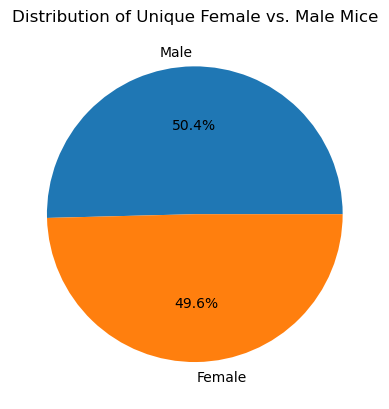

In [119]:
# Make the pie chart, using pyplot
plt.figure()
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")

# Adjust labels and display
plt.title("Distribution of Unique Female vs. Male Mice")

plt.show()

# Quartiles, Outliers, and Boxplots

In [120]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = mouse_data_cleaned.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoints_merge = pd.merge(mouse_data_cleaned, last_timepoints, on=["Mouse ID", "Timepoint"], how="right")
last_timepoints_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [121]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_name_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_name_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = last_timepoints_merge.loc[last_timepoints_merge["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # add subset
    tumor_volume_list.append(final_tumor_volume)

    # Determine outliers using upper and lower bounds
    lowerq = final_tumor_volume.quantile(0.25)
    upperq = final_tumor_volume.quantile(0.75)
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_volume[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]

    # Display results
    print(f"{treatment}'s IQR: {iqr}.")
    print(f"{treatment}'s potential outliers: {outliers.values}")
    print("-----")

Capomulin's IQR: 7.781863460000004.
Capomulin's potential outliers: []
-----
Ramicane's IQR: 9.098536719999998.
Ramicane's potential outliers: []
-----
Infubinol's IQR: 11.477135160000003.
Infubinol's potential outliers: [36.3213458]
-----
Ceftamin's IQR: 15.577752179999997.
Ceftamin's potential outliers: []
-----


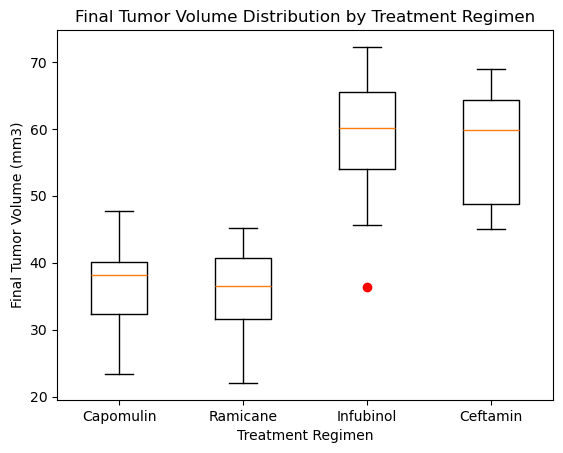

In [122]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure()
plt.boxplot(tumor_volume_list, 0, "ro") # Highlight outlier markers

# Adjust labels and display
plt.title("Final Tumor Volume Distribution by Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], treatment_name_list)

plt.show()

# Line and Scatter Plots

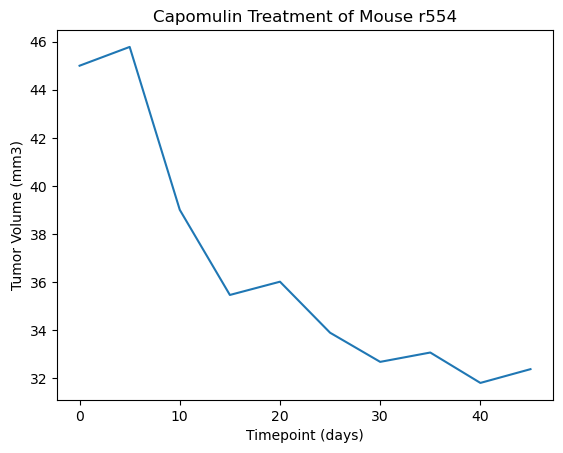

In [123]:
# Filer the DataFrame for Capomulin
capomulin_data = mouse_data_cleaned[mouse_data_cleaned["Drug Regimen"] == "Capomulin"]

# Select a single mouse
single_mouse_id = capomulin_data["Mouse ID"].iloc[42]

# Generate single mouse data
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == single_mouse_id]

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.figure()
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"])

# Adjust labels and display
plt.title(f"Capomulin Treatment of Mouse {single_mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

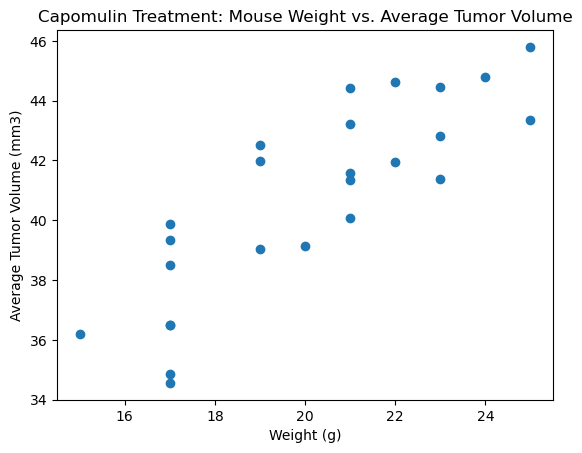

In [124]:
# Calculate average tumor volume and store in a DataFrame
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

# Locate individual mouse weights and store in a DataFrame
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first().reset_index()

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
x_values = mouse_weight["Weight (g)"]
y_values = average_tumor_volume["Tumor Volume (mm3)"]
plt.figure()
plt.scatter(x_values, y_values)

# Adjust labels and display
plt.title("Capomulin Treatment: Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

# Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84.


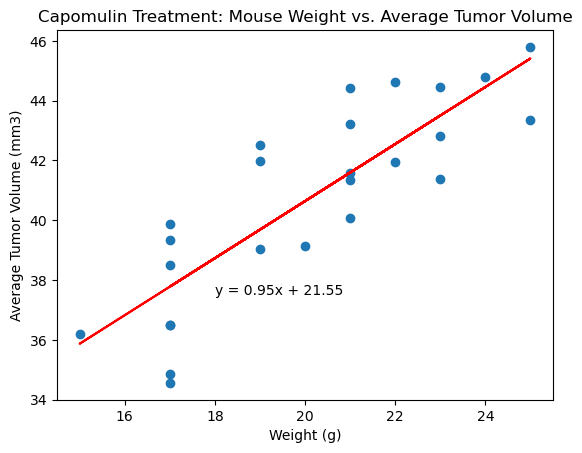

In [130]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"])

# Display the correlation coefficient
print(f"The correlation between mouse weight and average tumor volume is {correlation[0]:.2f}.")

# Regenerate scatter plot
plt.figure()
plt.scatter(x_values, y_values)
plt.title("Capomulin Treatment: Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Generate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Equation
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Display regression model on scatter plot
plt.plot(x_values,regress_values, "r-")
plt.text(18, 37.5, equation)

plt.show()